# Random Forest with Bagging - End-to-End Project

Problem Statement:
- Predict whether a loan applicant will default or not using customer financial and personal information.

Random Forest, a powerful machine learning algorithm based on the idea of bagging (Bootstrap Aggregation).

🗂 Dataset (Simulated)
We'll simulate a small loan default dataset with:

- income

- credit_score

- age

- loan_amount

- employment_status (categorical)

- default (target: 0 = No, 1 = Yes)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [12]:
# Creating Sample Data
# Sample data
data = {
    'income': np.random.randint(25000, 100000, 100),
    'credit_score': np.random.randint(300, 850, 100),
    'age': np.random.randint(21, 60, 100),
    'loan_amount': np.random.randint(5000, 40000, 100),
    'employment_status': np.random.choice(['employed', 'self-employed', 'unemployed'], 100),
    'default': np.random.choice([0, 1], 100, p=[0.7, 0.3])
}

df = pd.DataFrame(data)
df.head(10)


,income,credit_score,age,loan_amount,employment_status,default
0,45420,773,55,26142,employed,0
1,74615,560,39,30575,unemployed,1
2,25122,689,22,19943,unemployed,1
3,27284,588,24,28599,self-employed,0
4,45265,639,37,34815,unemployed,0
5,56857,534,21,25258,unemployed,1
6,67037,538,54,32150,unemployed,0
7,49494,733,49,15225,self-employed,0
8,99719,749,41,35065,unemployed,0
9,57319,837,52,26985,employed,0


In [3]:
# Data Cleaning
print(df.isnull().sum())  # Check for missing values
print(df.dtypes)          # Check datatypes



income               0
credit_score         0
age                  0
loan_amount          0
employment_status    0
default              0
dtype: int64
income                int64
credit_score          int64
age                   int64
loan_amount           int64
employment_status    object
default               int64
dtype: object


In [4]:
# Data Preprocessing
# Encode categorical
df['employment_status'] = LabelEncoder().fit_transform(df['employment_status'])

# Features and target
X = df.drop('default', axis=1)
y = df['default']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)



In [7]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.75
[[14  2]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.33      0.25      0.29         4

    accuracy                           0.75        20
   macro avg       0.58      0.56      0.57        20
weighted avg       0.73      0.75      0.74        20



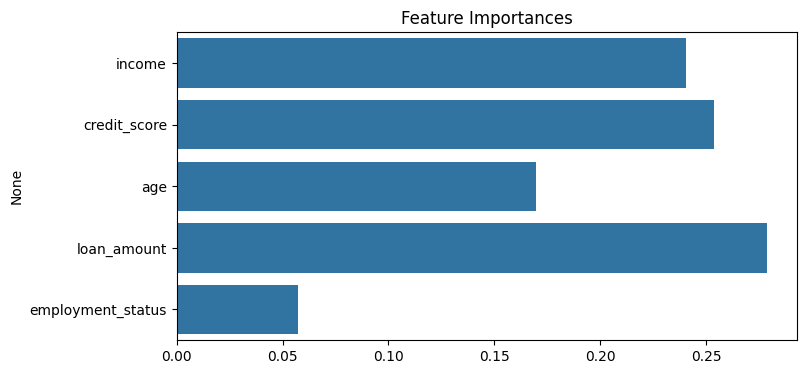

In [8]:
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()


In [9]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [10]:
# Final Evaluation with Tuned Model
y_pred_tuned = best_model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


Tuned Accuracy: 0.75
[[14  2]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.33      0.25      0.29         4

    accuracy                           0.75        20
   macro avg       0.58      0.56      0.57        20
weighted avg       0.73      0.75      0.74        20



| Benefit                            | Why It Matters                                  |
| ---------------------------------- | ----------------------------------------------- |
| 🎯 High accuracy                   | Handles both classification and regression well |
| 🔁 Reduces overfitting             | Through bagging (bootstrapped subsets)          |
| 🔍 Feature importance              | Helps in feature selection                      |
| 🧠 Handles missing data & outliers | Robust in real-world scenarios                  |
| 🧪 Works with non-linear data      | No need for feature scaling or linearity        |


| Limitation                     | Impact                                       |
| ------------------------------ | -------------------------------------------- |
| 🐢 Slow for large datasets     | Many trees = slower training/prediction      |
| 🧩 Less interpretable          | Hard to explain decisions                    |
| 💾 High memory                 | Each tree takes memory                       |
| ⚖️ Biased with imbalanced data | Needs techniques like class weights or SMOTE |


Real-World Use Cases
💳 Credit default prediction

🏥 Disease diagnosis

🏦 Fraud detection

📊 Customer segmentation

